In [17]:
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('cosmetics_.csv', encoding='utf-8')
df.head()

,gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
0,1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2
1,2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4
2,2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4
3,2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4
4,1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3


## 성별 전처리

In [6]:
# 성별 전처리
df['gender'] = df['gender'].replace([1, 2], ['male', 'female'])

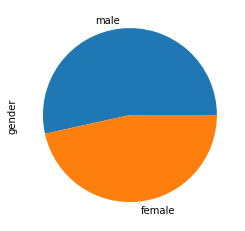

In [7]:
# 성별 count 및 pieplot으로 시각화
df['gender'].value_counts()
df['gender'].value_counts().plot(kind = "pie") 

In [9]:
# 결혼여부 전처리
df['marriage'] = df['marriage'].replace([1, 2, 3], ['single', 'married', 'other'])

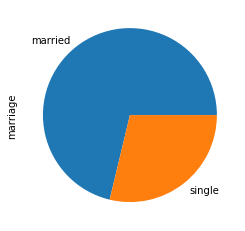

In [10]:
# 결혼여부 count 및 pieplot으로 시각화
df['marriage'].value_counts()
df['marriage'].value_counts().plot(kind="pie")

## 왜도와 첨도 분석해보기

In [12]:
# 왜도
df['amount'].skew()

8.727245406515182

In [13]:
# 첨도
df['amount'].kurtosis()

94.95150601199587

## Outlier 의 탐지 및 제거와 전후 분포 비교

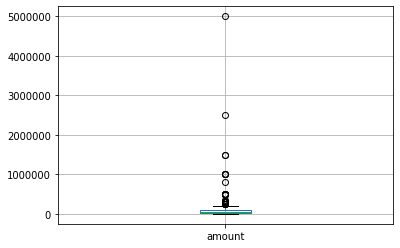

In [35]:
# amount 칼럼의 박스플롯 시각화를 통해 이상치 분포 확인
df.boxplot(column='amount')

In [37]:
# 칼럼의 데이터 요약정보 확인
df['amount'].describe()

count    2.470000e+02
mean     1.539393e+05
std      3.980750e+05
min      3.000000e+03
25%      3.000000e+04
50%      5.200000e+04
75%      1.000000e+05
max      5.000000e+06
Name: amount, dtype: float64

In [38]:
# 사분위수 값 확인
df['amount'].quantile()

52000.0

In [39]:
# 중위값 확인
df['amount'].median()

52000.0

In [40]:
# Inter-Quantile == 바닥부터 75% 지점의 값 - 바닥부터 25% 지점의 값

Q1 = df['amount'].quantile(q = 0.25)
Q3 = df['amount'].quantile(q = 0.75)

IQR = Q3 - Q1
IQR

70000.0

In [41]:
# 상한치 : 바닥부터 75% 지점의 값 + IQR의 1.5배 
# 하한치 : 바닥부터 25% 지점의 값 - IQR의 1.5배 
# 그 기준을 넘기면 Outlier로 판단이 가능 

df_IQR = df[ (df['amount'] < Q3 + IQR * 1.5) & (df['amount'] > Q1 - IQR * 1.5) ]  

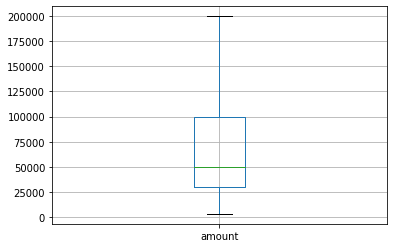

In [42]:
df_IQR.boxplot(column='amount')

## 교차검정 & 평균차이검정, 상관관계 분석

#### '구매성향'을 기준으로 '피부타입'의 빈도를 분석해보기
- propensity : 구매 성향 (비교적 저렴한 제품, 중간 정도의 제품, 비교적 고가의 제품)
- skin : 피부 타입 (건성, 민감성, 중성, 지성/여드름성, 복합성)

In [16]:
# 구매성향 - 피부타입 간의 빈도 분석
crosstab = pd.crosstab(df.propensity, df.skin, margins=True)

crosstab.columns=["건성", "민감성", "중성", "지성", "여드름성", "합계"]
crosstab.index=["비교적 저렴한 제품", "중간정도의 제품", "비교적고가의 제품", "합계"]
crosstab

,건성,민감성,중성,지성,여드름성,합계
비교적 저렴한 제품,22,1,12,11,14,60
중간정도의 제품,39,8,47,16,23,133
비교적고가의 제품,20,11,10,4,9,54
합계,81,20,69,31,46,247


In [20]:
# 구매성향 - 피부타입 간의 P-value값 확인
stats.chisquare(df.propensity, df.skin) 

Power_divergenceResult(statistic=291.8166666666667, pvalue=0.023890557260065975)

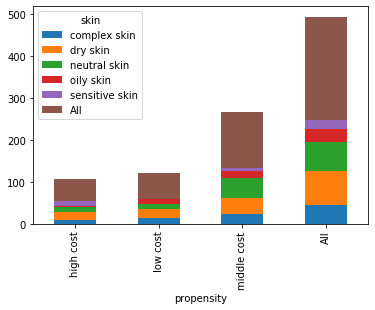

In [22]:
# 빈도 분석 시각화
df['propensity'] = df['propensity'].replace([1, 2, 3], ['low cost', 'middle cost', 'high cost'])
df['skin'] = df['skin'].replace([1, 2, 3, 4, 5], ['dry skin', 'sensitive skin', 'neutral skin', 'oily skin', 'complex skin'])

ct = pd.crosstab(df.propensity, df.skin, margins=True)

ct.plot.bar(stacked=True)

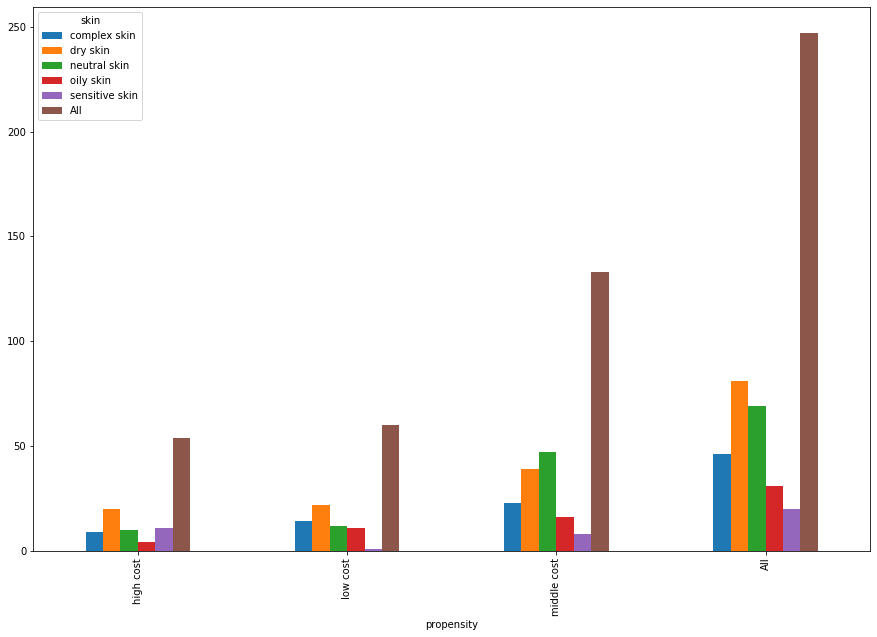

In [23]:
ct.plot.bar(stacked=False, figsize=(15, 10))

## 두 집단간의 평균차이를 검정해보기
- 독립표본 t-test 분석과 시각화

In [24]:
df = pd.read_csv('cosmetics_.csv', encoding='utf-8')
df.head()

,gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
0,1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2
1,2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4
2,2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4
3,2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4
4,1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3


In [27]:
# 전반적인 만족도(satisf_al) 의 성별(표본집단 끼리) 비교
male = df[ df['gender']==1 ].satisf_al.values # gender가 1인 행들의 satisf_al 열의 값들
female = df[ df['gender']==2 ].satisf_al.values

In [29]:
# 성별 끼리 t-test 값 분석
stats.ttest_ind(male, female)

Ttest_indResult(statistic=-0.494589803056421, pvalue=0.6213329051985961)

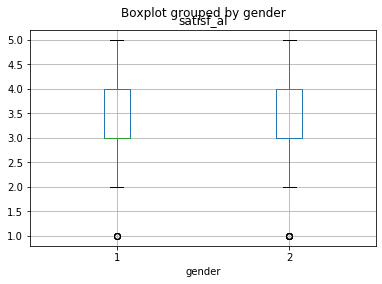

In [30]:
# 전반적인 만족도(satisf_al) 의 성별(표본집단 끼리)집단 시각화
df.boxplot(column='satisf_al', by='gender')

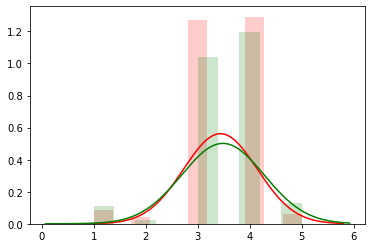

In [31]:
# kde=False 로 해주어야 각각의 빈도 수에 따른 그래프를 가리고 평균만 나타낼 수 있음
# fit에 scipy.stats.norm을 지정하여 평균을 나타내는 그래프 선을 그릴 수 있음
# hist_kws & fit_kws 는 히스토그램과 fitting line의 서식을 지정하는 keywords

sns.distplot(male, kde=False, fit=stats.norm,
            hist_kws={'color': 'r', 'alpha': 0.2}, fit_kws={'color': 'r'})

sns.distplot(female, kde=False, fit=stats.norm, 
             hist_kws={'color': 'g', 'alpha': 0.2}, fit_kws={'color': 'g'})

## 두 집단간의 평균차이를 검정해보기
- 대응표본 t-test 분석과 시각화 : 동일한 모집단으로부터 추출된 두 변수의 평균값을 비교 분석

- satisf_b : 구매 가격에 대한 만족도 (5점 척도)
- satisf_i : 구매 문의에 대한 만족도 (5점 척도)

In [32]:
# 두 칼럼의 요약 정보 확인
df[['satisf_b', 'satisf_i']].describe()

,satisf_b,satisf_i
count,247.000000,247.000000
mean,2.890688,3.404858
std,0.780995,0.830110
min,1.000000,1.000000
25%,2.000000,3.000000
50%,3.000000,3.000000
75%,3.000000,4.000000
max,5.000000,5.000000


In [33]:
# t-test 분석
stats.ttest_rel(df["satisf_b"], df["satisf_i"])

Ttest_relResult(statistic=-7.155916401026872, pvalue=9.518854506666397e-12)

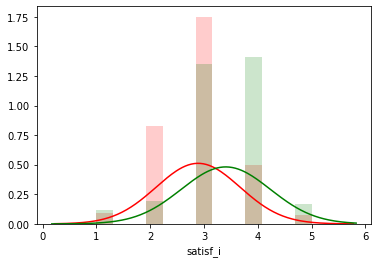

In [34]:
sns.distplot(df["satisf_b"], kde=False, fit=stats.norm,
            hist_kws={'color': 'r', 'alpha': 0.2}, fit_kws={'color': 'r'})

sns.distplot(df["satisf_i"], kde=False, fit=stats.norm, 
             hist_kws={'color': 'g', 'alpha': 0.2}, fit_kws={'color': 'g'})